<img src="../files/misc/logo.png" width=300/>
<h1 style="color:#872325"> Webscrapping </h1>

De acuerdo a [Wikipedia](https://es.wikipedia.org/wiki/Web_scraping), *Web Scrapping*, 

> es una técnica utilizada mediante programas de software para extraer información de sitios web. Usualmente, estos programas simulan la navegación de un humano en la World Wide Web ya sea utilizando el protocolo HTTP manualmente, o incrustando un navegador en una aplicación.

Para fines prácticos, realizamos un web scrapping cuándo no contamos con alguna manera de acceder a información estructurada de datos por analizar (.csv, .json, base de datos, API). 

---

## HTML
Al hacer webscrapping, dependemos de la estructura de la página web para poder acceder a la información que deseamos obtener. La estructura de la página web se define mediante un lenguaje llamado `HTML` (Hypertext Markup Language) el cual se compone por medio de *tags*.

```HTML
<tag>
</tag>
```

Un *tag* define una sección de la página. Cada *tag* tiene una propiedad. Un conjunto de estos tags definen el cuerpo de la página.


### Una primera página web
```HTML
<!DOCTYPE html>
<html>
<body>

<h1>Data Science and Machine Learning</h1>

</body>
</html>
```

Para nuestros fines, un *tag* representará una sección dentro de la página la cuál nos gustaría explorar o extraer.

---

## CSS

Un *Cascading Style Sheet* (CSS), es un archivo que viene acompañado de un html y define el estilo de la página.

```CSS
selector {
    property: property-value;
}
```

Cada *selector* contiene diferentes [propiedades](http://web.simmons.edu/~grabiner/comm244/weekthree/css-basic-properties.html) de acuerdo al *tag*, clase o *id* que le corresponda.

Para fines de webscrapping, un los *tags*, *ids* y *clases* ofrencen estrucura dentro de una página.

* Tags: estructura general
* Clase: secciones genéricas dentro de una página
* *id*: Secciones especifícas

---

## Javascript y el DOM

La mayoría de las páginas que visitamos hoy en día son interactivas. La interactividad de un una página web es proporcionada por un lenguaje de programación llamado `javascript`.

La manera en la que Javascript asigna u obtiene elementos de una página se conoce como el *Document Object Notation* (DOM).

Para fines de webscrapping, esto es importante puesto que en ocasiones, una página es vacía hasta que un programa de Javascript se ejecuta para arrojar información.

## Un primer webscrap

En este módulo estaremos ocupando la librería [requests_html](https://github.com/psf/requests-html) para hacer webscrapping.

In [7]:
#!pip install requests_html

     |████████████████████████████████| 1.2MB 505kB/s eta 0:00:01
     |████████████████████████████████| 71kB 7.1MB/s eta 0:00:011
  Created wheel for pyppeteer: filename=pyppeteer-0.0.25-cp37-none-any.whl size=78362 sha256=6f14fde699f6a1958456b20f41ba572b711b619bdc4e92bf2902d58bcfdaa720
  Stored in directory: /Users/grguevara/Library/Caches/pip/wheels/34/e0/5d/070e22eceecf7ecd5fa4b86bbc18c1c7d0b90e02e9b57f35eb
  Created wheel for bs4: filename=bs4-0.0.1-cp37-none-any.whl size=1273 sha256=05f1a51e5ca1811159cac93f87a55c670d970773e7b2fd9fe6a80a6a1efe7c02
  Stored in directory: /Users/grguevara/Library/Caches/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
  Created wheel for parse: filename=parse-1.14.0-cp37-none-any.whl size=23463 sha256=bd8430106f09903b9f4947bfad6c7089e02638588ca49b4cc3bada48210ec5a2
  Stored in directory: /Users/grguevara/Library/Caches/pip/wheels/d7/07/e0/b74bfdc1d434e73ef79e69e301e82a7825e0c070f7442beb61
  Created wheel for fake-useragent: fi

In [30]:
from requests_html import HTML    # otra librería es beautifulsoup

In [31]:
with open("/Users/grguevara/Google Drive File Stream/My Drive/Diplomado - DS and ML/Modulo 3/data-science/files/lec04/ex03.html") as f:
    webp = f.read()

html = HTML(html=webp)
print(html.html)

<!DOCTYPE html>
<html>
<head>
    <link href="style2.css" rel="stylesheet"/>
</head>

<body>

    <h1>Data Science and Machine Learning</h1>

    <div class="my_class">
        <p> By <a href="https://bit.ly/34EdyH2">Analysic Nabla</a></p>
        <p> At the <a href="https://bit.ly/2qDvao4">ITAM</a></p>
    </div>

</body>
</html>



In [32]:
# Extrayendo todos los links de la página
html.links

{'https://bit.ly/2qDvao4', 'https://bit.ly/34EdyH2'}

In [33]:
# Extrayendo el primer encabezado de la página
html.find("H1", first=True).text

'Data Science and Machine Learning'

In [34]:
# Buscando todos los elementos <p> (paragrapshs)
html.find("p")

[<Element 'p' >, <Element 'p' >]

In [15]:
# forma 1
for i in html.find("p"):
    print(i.text)
    
# forma 2
[p.text for p in html.find("p")]

By Analysic Nabla
At the ITAM


['By Analysic Nabla', 'At the ITAM']

In [16]:
# Extrayendo una sección dentro de un div
html.find("div", first=True)

<Element 'div' class=('my_class',)>

### Un segundo ejemplo

In [17]:
with open("/Users/grguevara/Google Drive File Stream/My Drive/Diplomado - DS and ML/Modulo 3/data-science/files/lec04/ex04.html") as f:
    webp = f.read()

html = HTML(html=webp)
print(html.html)

<!DOCTYPE html>
<html>
<head>
    <link href="style2.css" rel="stylesheet"/>
    <script>
        function sendGreeting() {
            document.getElementById("greeting").innerHTML = "Aprendamos a hacer webscrapping!"
        }
        

    </script>
</head>

<body onload="sendGreeting()">
    <h1>Data Science and Machine Learning</h1>

    <div class="my_class">
        <p>Por Analysic Nabla</p>
        <p>En el ITAM</p>
        <p id="greeting"></p>
    </div>

</body>
</html>



In [18]:
# ¿Qué notamos en este ejemplo que no concuerde
# con lo que esperaríamos ver en la página?
for item in html.find("p"):
    print(item.text) 
    
    #no me imprime el greeting porque es una función, y el HTML sólo me lee el texto
    # usemos html.render() para poder correr 

Por Analysic Nabla
En el ITAM



In [19]:
html.find("p[id='greeting']", first=True)  # estructura: tag[atributo="valor"]

<Element 'p' id='greeting'>

<h1 style="color:#872325">HTTP Requests</h1>

Las páginas que visitamos día a día viven en un servidor y no en nuestra computadora. Al abrir nuestro navegador y entrar a una página, el navegador solicita la información de la página al servidor por medio de un proceso de intercambio de información conocido como HTTP.

> *Hypertext Transfer Protocol* (HTTP) es un proceso mediante el cual se hace un intercambio de información entre un cliente (un navegador) y un servidor por medio de mensajes.

![server](https://mdn.mozillademos.org/files/13677/Fetching_a_page.png)
**Fuente**x: https://developer.mozilla.org

In [20]:
# tipos de requests principales: request GET y request POST
# 

Dependiendo del tipo de mensaje que le mandemos a un servidor, este procesará la información enviada desde el cliente (nosotros) de diferentes maneras. Para fines de webscrapping, los métodos más comúnes de comunicarte con un servidor son:

* `GET`: Solicitia un archivo determinado al servidor. Un *GET Request* se debe usar exclusivamente para adquirir información.
    * Obtener información de una página web
    * Cargar una imágen

* `POST`: Envía datos al servidor para ser procesados
    * Dejar tu número celular en una página
    * Loggearte
    * Dejar un comentario en un blog post

En Python, podemos hacer conexiones a una página por medio de la librería `requests`

In [21]:
import requests

In [22]:
r = requests.get("https://nabla.mx")
r # si la respuesta es 200 es que es un éxito, si la info no existe te regresa el 404. 403 la info está encriptada o necesitas logearte 

<Response [200]>

In [23]:
html = HTML(html=r.text) # forma larga

In [24]:
# ejemplo de como abrir un PDF
url = "https://arxiv.org/pdf/1901.08943.pdf"
r = requests.get(url)
r

<Response [200]>

In [25]:
with open("paper.pdf",)

SyntaxError: invalid syntax (<ipython-input-25-4256cfff0b69>, line 1)

Posteriormente tendríamos que pasarlo a una instancia de la clase `HTML` para poder analizar la página. Para evitar esto, podemos hacer uso de la clase `HTMLSession` que nos permite hacer llamadas al servidor y acceso al html que nos regrese.

In [ ]:
from requests_html import HTMLSession

In [ ]:
with HTMLSession() as sess:
    r = sess.get("https://nabla.mx")
r

In [ ]:
r.html.links

<h1 style="color:#872325">Webscrapping</h1>

<h2 style="color:teal">Ejemplo: Arxiv ML Papers (I)</h2>

Consigue el nombre y el link de los último 25 papers en Machine Learning publicados en Arxiv y guárdalos dentro de un archivo `csv`.

In [38]:
from requests_html import HTMLSession
import pandas as pd

In [39]:
url = "https://arxiv.org/list/stat.ML/recent"
with HTMLSession() as sess:
    r = sess.get(url)
r

<Response [200]>

In [40]:
info = []

dl = r.html.find("dl",first=True)

dt = dl.find("dt")
dd = dl.find("dd")

for dti, ddi in zip (dt,dd): # se ocupa un zip porque quiero estar buscando simultaneamente lo que vive en dt y dd
    title = ddi.find("div[class = 'list-title mathjax']", first=True).text
    #print(title.lstrip("Title: "))
    
    link = dti.find("a[title = 'Download PDF']",first=True)
    link, *_ = link.absolute_links
    #print(link)
    
    authors = ddi.find("div[class = 'list-authors']", first=True)
    authors = authors.text.lstrip("Authors: ")
    #print(authors)
    
#    paper_id = dti.find("a")
    
    record = {
        "title": title,
        "link": link,
        "author": authors,
    }
    
    info.append(record)
    

In [49]:
df = pd.DataFrame(info)
#df.to_excel("arxive.xlsx")
df

title  \
0   Title: PAPRIKA: Private Online False Discovery...   
1   Title: MetFlow: A New Efficient Method for Bri...   
2   Title: Semi-supervised Anomaly Detection on At...   
3   Title: Fast and Three-rious: Speeding Up Weak ...   
4   Title: Max-Affine Spline Insights into Deep Ge...   
5   Title: State-only Imitation with Transition Dy...   
6   Title: Conditional Sampling from Invertible Ge...   
7   Title: A Distributional Framework for Data Val...   
8   Title: Estimating the Effects of Continuous-va...   
9        Title: The Spectral Underpinning of word2vec   
10  Title: Advances in Collaborative Filtering and...   
11  Title: Heterogeneous Graph Neural Networks for...   
12  Title: An On-Device Federated Learning Approac...   
13             Title: Deep Randomized Neural Networks   
14  Title: CATA++: A Collaborative Dual Attentive ...   
15  Title: Lipschitz and Comparator-Norm Adaptivit...   
16  Title: Woodbury Transformations for Deep Gener...   
17  Title: On Isometry Robustness of Deep 3D Point...   
18  Title: Prediction of adverse events in Afghani...   
19  Title: Entangled Watermarks as a Defense again...   
20  Title: Optimistic Exploration even with a Pess...   
21         Title: Kalman Recursions Aggregated Online   
22  Title: Multi-source Domain Adaptation in the D...   
23  Title: Infinitely Wide Graph Convolutional Net...   
24  Title: Performance Analysis of Semi-supervised...   

                                link  \
0   https://arxiv.org/pdf/2002.12321   
1   https://arxiv.org/pdf/2002.12253   
2   https://arxiv.org/pdf/2002.12011   
3   https://arxiv.org/pdf/2002.11955   
4   https://arxiv.org/pdf/2002.11912   
5   https://arxiv.org/pdf/2002.11879   
6   https://arxiv.org/pdf/2002.11743   
7   https://arxiv.org/pdf/2002.12334   
8   https://arxiv.org/pdf/2002.12326   
9   https://arxiv.org/pdf/2002.12317   
10  https://arxiv.org/pdf/2002.12312   
11  https://arxiv.org/pdf/2002.12307   
12  https://arxiv.org/pdf/2002.12301   
13  https://arxiv.org/pdf/2002.12287   
14  https://arxiv.org/pdf/2002.12277   
15  https://arxiv.org/pdf/2002.12242   
16  https://arxiv.org/pdf/2002.12229   
17  https://arxiv.org/pdf/2002.12222   
18  https://arxiv.org/pdf/2002.12211   
19  https://arxiv.org/pdf/2002.12200   
20  https://arxiv.org/pdf/2002.12174   
21  https://arxiv.org/pdf/2002.12173   
22  https://arxiv.org/pdf/2002.12169   
23  https://arxiv.org/pdf/2002.12168   
24  https://arxiv.org/pdf/2002.12164   

                                               author  
0       Wanrong Zhang, Gautam Kamath, Rachel Cummings  
1   chille Thin, Nikita Kotelevskii, Jean-Stanisla...  
2        i Kumagai, Tomoharu Iwata, Yasuhiro Fujiwara  
3   Daniel Y. Fu, Mayee F. Chen, Frederic Sala, Sa...  
4   Randall Balestriero, Sebastien Paris, Richard ...  
5                          Tanmay Gangwani, Jian Peng  
6   Erik M. Lindgren, Jay Whang, Alexandros G. Dim...  
7          mirata Ghorbani, Michael P. Kim, James Zou  
8    Ioana Bica, James Jordon, Mihaela van der Schaar  
9   iel Jaffe, Yuval Kluger, Ofir Lindenbaum, Jona...  
10                                           Liwei Wu  
11  Ziqi Liu, Chaochao Chen, Xinxing Yang, Jun Zho...  
12          Rei Ito, Mineto Tsukada, Hiroki Matsutani  
13              Claudio Gallicchio, Simone Scardapane  
14                    Meshal Alfarhood, Jianlin Cheng  
15                 Zakaria Mhammedi, Wouter M. Koolen  
16                                 You Lu, Bert Huang  
17        Yue Zhao, Yuwei Wu, Caihua Chen, Andrew Lim  
18  Krzysztof Fiok (1), Waldemar Karwowski (1), Ma...  
19  Hengrui Jia, Christopher A. Choquette-Choo, Ni...  
20  Tabish Rashid, Bei Peng, Wendelin Böhmer, Shim...  
21  Eric Adjakossa (LPSM), Yannig Goude (EDF R&D),...  
22  Sicheng Zhao, Bo Li, Colorado Reed, Pengfei Xu...  
23       Jilin Hu, Jianbing Shen, Bin Yang, Ling Shao  
24                         Varun Mannam, Arman Kazemi

In [ ]:
!open arxive.xlsx

In [42]:
divpage = r.html.find("div[id='dlpage']", first=True)

In [43]:
divpage.find("h1", first=True).text

'Machine Learning'

In [44]:
papers_links = divpage.find("dt")
len(papers_links)

25

In [45]:
papers_titles = divpage.find("dd")
len(papers_titles)

25

In [46]:
values = []
for link_secc, title_secc in zip(papers_links, papers_titles):
    title = title_secc.find("div[class='list-title mathjax']", first=True).text
    
    abstract_url = link_secc.find("a[title='Abstract']", first=True).absolute_links
    abstract_url, *_ = abstract_url
    
    values.append([title, abstract_url])

In [47]:
df_values = pd.DataFrame(values, columns=["title", "url"])
df_values.head()

title  \
0  Title: PAPRIKA: Private Online False Discovery...   
1  Title: MetFlow: A New Efficient Method for Bri...   
2  Title: Semi-supervised Anomaly Detection on At...   
3  Title: Fast and Three-rious: Speeding Up Weak ...   
4  Title: Max-Affine Spline Insights into Deep Ge...   

                                url  
0  https://arxiv.org/abs/2002.12321  
1  https://arxiv.org/abs/2002.12253  
2  https://arxiv.org/abs/2002.12011  
3  https://arxiv.org/abs/2002.11955  
4  https://arxiv.org/abs/2002.11912

In [48]:
# Depuramos la información que no necesitamos
df_values = df_values.assign(title=df_values.title.str.lstrip("Title: "))
df_values.head()

title  \
0  PAPRIKA: Private Online False Discovery Rate C...   
1  MetFlow: A New Efficient Method for Bridging t...   
2  Semi-supervised Anomaly Detection on Attribute...   
3  Fast and Three-rious: Speeding Up Weak Supervi...   
4  Max-Affine Spline Insights into Deep Generativ...   

                                url  
0  https://arxiv.org/abs/2002.12321  
1  https://arxiv.org/abs/2002.12253  
2  https://arxiv.org/abs/2002.12011  
3  https://arxiv.org/abs/2002.11955  
4  https://arxiv.org/abs/2002.11912

In [ ]:
# df_values.to_csv("ML-arxiv.csv", index=False)

## Queries al sistema

En ocasiones un *GET method* puede venir acompañado con parámetros obligatorios u opcionales para el sistema.

* Se denota una sección de parámetros de consulta por medio de `?`.
* cada par parametro-valor se denota `param=val`
* se separa cada query por medio de `&`

```
http://some-page.com?key1=val1&key2=val2&..&keyn=valn
```

In [ ]:
url = "https://arxiv.org/list/stat.ML/recent?show=250"
with HTMLSession() as sess:
    r = sess.get(url)
r

In [ ]:
papers_titles = r.html.find("div[id='dlpage']", first=True).find("dd")
len(papers_titles)

### Una manera más limpia de mandar queries

In [ ]:
url = "https://arxiv.org/list/stat.ML/recent"
data = {
    "show": 250
}
with HTMLSession() as sess:
    r = sess.get(url, params=data)
r

In [ ]:
papers_titles = r.html.find("div[id='dlpage']", first=True).find("dd")
len(papers_titles)

<h1 style="color:#872325">APIs</h1>

En ocasiones no es necesario acceder a un HTML a fin de obtener la información deseada de una página web. 

Un API (*Application programming interface*),
> es un protocolo de comunicación entre un cliente y un servidor diseñado para simplificar la creación aplicaciónes por parte del cliente. [...] Un API está diseñado de tal manera que si el cliente hace una petición al sistema en un formato específico, siempre tendrá el mismo formato de respuesta por parte del servidor, o iniciará una acción definida.

En esta sección ocuparemos el API de [Alpha Vantage](https://www.alphavantage.co), un proveedor de información histórica y tiempo real de datos de acciones, FX y criptomonedas.

<h2 style="color:teal">Ejemplo: Alpha Vantage</h2>

A fin de hacer mejor uso de un API es importante siempre revisar la documentación del API.

In [210]:
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [211]:
%config InlineBackend.figure_format = "retina"

In [212]:
url = "https://www.alphavantage.co"
base_url = "https://www.alphavantage.co/query"
# Cargamos el API Key de Alpha Vantage (es personal)
avkey = "BOAU51QMXOGSH4O1"

In [213]:
curr_list_url = "https://www.alphavantage.co/physical_currency_list/"
curr_list = pd.read_csv(curr_list_url).set_index("currency name")
curr_list.head() 
# esto no se guarda en la compu, directo se va a memoria RAM

currency code
currency name                              
United Arab Emirates Dirham             AED
Afghan Afghani                          AFN
Albanian Lek                            ALL
Armenian Dram                           AMD
Netherlands Antillean Guilder           ANG

In [214]:
from_curr = "United States Dollar"
curr_list.filter([from_curr], axis=0)

currency code
currency name                     
United States Dollar           USD

In [215]:
currencies = ["Mexican Peso", "Euro", "Brazilian Real", "Argentine Peso"]
target_curr = curr_list.filter(currencies, axis=0)
target_curr

currency code
currency name               
Mexican Peso             MXN
Euro                     EUR
Brazilian Real           BRL
Argentine Peso           ARS

## Mensajes de Error

Entramos a la páginas de AlphaVantage y revisamos la documentación para descargar información

In [216]:
intraday1 = {
    "function": "FX_INTRADAY",
    "to_currency": target_curr["currency code"].values[0],
    "from_currency": "USD",
    "apikey": avkey
}

r = requests.get(base_url, params=intraday1)
r

<Response [200]>

In [217]:
r.json()

{'Error Message': 'Invalid API call. Please retry or visit the documentation (https://www.alphavantage.co/documentation/) for FX_INTRADAY.'}

In [218]:
intraday2 = {
    "function": "FX_INTRADAY",
    "to_symbol": target_curr["currency code"].values[0],
    "from_symbol": "USD",
    "apikey": avkey,
    "interval": "1min"
}

r = requests.get(base_url, params=intraday2)
r

<Response [200]>

## Manipulando Información de Respuesta

Una vez obtenida la información del API, el siguiente paso es manipular la información para poder analizarla. De ser una seríe de tiempo, lo más natural sería manipularla usando un pandas DataFrame.

In [219]:
data = r.json()
data.keys()

dict_keys(['Meta Data', 'Time Series FX (1min)'])

In [220]:
data["Meta Data"]

{'1. Information': 'FX Intraday (1min) Time Series',
 '2. From Symbol': 'USD',
 '3. To Symbol': 'MXN',
 '4. Last Refreshed': '2020-03-01 21:15:00',
 '5. Interval': '1min',
 '6. Output Size': 'Compact',
 '7. Time Zone': 'UTC'}

In [221]:
df_data = pd.DataFrame(data["Time Series FX (1min)"]).T
df_data.head()

1. open  2. high   3. low 4. close
2020-03-01 21:15:00  19.8635  19.8652  19.8635  19.8652
2020-03-01 21:14:00  19.8652  19.8652  19.8652  19.8652
2020-03-01 21:13:00  19.8652  19.8652  19.8652  19.8652
2020-03-01 21:12:00  19.8652  19.8652  19.8652  19.8652
2020-03-01 21:11:00  19.8652  19.8652  19.8652  19.8652

In [41]:
df_data.dtypes

1. open     object
2. high     object
3. low      object
4. close    object
dtype: object

## FX Daily

In [222]:
intraday1 = {
    "function": "FX_DAILY",
    "to_symbol": target_curr["currency code"].values[0],
    "from_symbol": "USD",
    "apikey": avkey,
    "outputsize": "full",
}

r = requests.get(base_url, params=intraday1)
r

<Response [200]>

In [235]:
data = r.json()

In [236]:
df_data = pd.DataFrame(data["Time Series FX (Daily)"], dtype=float).T.sort_index()

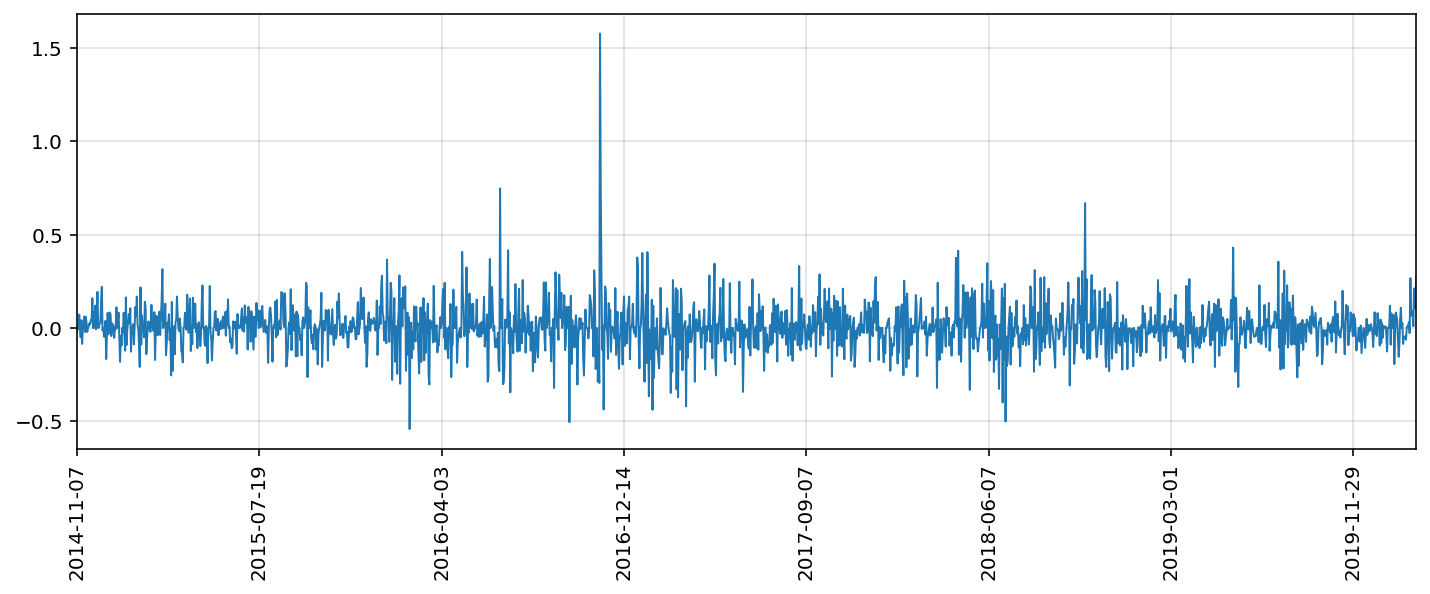

In [225]:
(df_data.apply(lambda x: x["4. close"] - x["1. open"], axis=1)
        .plot(figsize=(12, 4), linewidth=1))
plt.xticks(rotation=90)
plt.grid(alpha=0.4)

<h1 style="color:#872325">API Wrappers (Liberías)</h1>

Como hemos visto, utilizar un API require la codificación de los parámetros que espera recibir el servidor, hacer la llamada al servidor para validar la respuesta y manipular la información recibida a fin de hacer uso de esta.

De querer obtener el mismo formato de respuesta sería necesario crear una librería en Python que contemple cada uno de estos pasos, lo cuál se podría volver una tarea tediosa.

Un **API Wrapper** es una librería escrita en un lenguaje de programación que nos da acceso a un API usando un lenguaje de programación específico

**Nota**: Una de las desventajas de usar un API Wrapper son los posibles *bugs* que el wrapper podría tener.

https://github.com/RomelTorres/alpha_vantage

```
pip install alpha_vantage
```

In [227]:
!pip install alpha_vantage

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
The folder you are executing pip from can no longer be found.


In [228]:
from alpha_vantage.foreignexchange import ForeignExchange

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/grguevara/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-228-215e32ae650f>", line 1, in <module>
    from alpha_vantage.foreignexchange import ForeignExchange
ModuleNotFoundError: No module named 'alpha_vantage'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/grguevara/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2040, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'ModuleNotFoundError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/grguevara/opt/anaconda3/lib/python3.7/site-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerfra

ModuleNotFoundError: No module named 'alpha_vantage'

In [57]:
fx = ForeignExchange(key=avkey, output_format="pandas")
data, metadata = fx.get_currency_exchange_daily("USD", "MXN")
data["4. close"].plot()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/grguevara/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-57-8bb798199eb8>", line 1, in <module>
    fx = ForeignExchange(key=avkey, output_format="pandas")
NameError: name 'ForeignExchange' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/grguevara/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2040, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/grguevara/opt/anaconda3/lib/python3.7/site-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_o

NameError: name 'ForeignExchange' is not defined

<h2 style="color:crimson">Ejercicios</h2>

1. Repite el ejemplo *Arxiv ML Papers (I)*, agrega dos nuevas columnas al DataFrame final: `Abstract`, con el resumen de cada paper; `Submitted`, con la fecha en la que fue agregado al sistema. **Hint**: Ambos elementos se encuentran dentro de la *url* encontrada.

----

2. Por medio de la librería `requests` y el API de AlphaVantage, consigue los precios históricos de las monedas `["MXN", "EUR", "BRL", "ARS", "CHF"]` respecto al dólar (todos los precios deben estar en dólares). Crea un DataFrame con cada colúmna la moneda de referencia:

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>MXN</th>      <th>EUR</th>      <th>BRL</th>      <th>ARS</th>      <th>CHF</th>    </tr>  </thead>  <tbody>    <tr>      <th>2014-11-24</th>      <td>0.0732</td>      <td>1.2438</td>      <td>0.3920</td>      <td>0.1169</td>      <td>1.0342</td>    </tr>    <tr>      <th>2014-11-25</th>      <td>0.0731</td>      <td>1.2473</td>      <td>0.3955</td>      <td>0.1169</td>      <td>1.0370</td>    </tr>    <tr>      <th>2014-11-26</th>      <td>0.0728</td>      <td>1.2507</td>      <td>0.3995</td>      <td>0.1168</td>      <td>1.0401</td>    </tr>    <tr>      <th>2014-11-27</th>      <td>0.0726</td>      <td>1.2458</td>      <td>0.3947</td>      <td>0.1169</td>      <td>1.0363</td>    </tr>    <tr>      <th>2014-11-28</th>      <td>0.0717</td>      <td>1.2451</td>      <td>0.3891</td>      <td>0.1168</td>      <td>1.0351</td>    </tr>  </tbody></table>


----
3. Con el DataFrame creado en el ejercicio 2, crea el siguiente mapa de calor con la correlación entre cada una de las monedas. **hint**: Revisa que métodos tiene un DataFrame para crear correlaciones; considera la librería `seaborn`.

![](../files/lec04/imgs/heatmap.png)

---

4. Con el DataFrame creado en el ejercicio 2, crea un nuevo DataFrame que incluya una correlación móvil con ventana de 30 días de cada una de las monedas respecto a `"MXN"`. **hint**: Investiga sobre el método `.xs` de un DataFrame

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>EUR</th>      <th>BRL</th>      <th>ARS</th>      <th>CHF</th>    </tr>  </thead>  <tbody>    <tr>      <th>2015-03-19</th>      <td>0.900941</td>      <td>0.870440</td>      <td>0.835029</td>      <td>0.916637</td>    </tr>    <tr>      <th>2015-03-20</th>      <td>0.874866</td>      <td>0.815453</td>      <td>0.762308</td>      <td>0.903594</td>    </tr>    <tr>      <th>2015-03-22</th>      <td>0.866783</td>      <td>0.789977</td>      <td>0.726098</td>      <td>0.900547</td>    </tr>    <tr>      <th>2015-03-23</th>      <td>0.835823</td>      <td>0.728781</td>      <td>0.643129</td>      <td>0.885424</td>    </tr>    <tr>      <th>2015-03-24</th>      <td>0.801267</td>      <td>0.671188</td>      <td>0.560149</td>      <td>0.877682</td>    </tr>  </tbody></table>

---

5. Con el DataFrame creado en el ejercicio 4, crea la siguiente figura con _scatterplots_ entre todas las combinaciones de las correlaciones respecto a `"MXN"`. ¿Encuentras algún patrón en alguna combinación?

![](../files/lec04/imgs/scatter.png)

---

6. Con el DataFrame creado en el ejercicio 4, crea la siguiente figura, la cuál representa, a cada observación, la correlación promedio entre todas las monedas respecto a `"MXN"` y unas bandas que representan la correlación máxima y mínima a cada observación.

![](../files/lec04/imgs/corr_ts.png)

# Respuestas



In [200]:


# Ejercicio 1



In [204]:
from requests_html import HTMLSession
import pandas as pd

In [205]:
# conexión a la página principal
url = "https://arxiv.org/list/stat.ML/recent"
with HTMLSession() as sess:
    r = sess.get(url)
r

<Response [200]>

In [206]:
# conexión para leer cada abstract que vive en otro link

import locale
locale.setlocale(locale.LC_TIME,"es_ES.UTF-8")
from datetime import datetime

def read_abstract(url_abstract):
    with HTMLSession() as sess:
        r = sess.get(url_abstract)
        
        # abstract    
        abst = r.html.find("blockquote[class = 'abstract mathjax']", first=True)
        abst = abst.text.lstrip("Abstract: ")
        
        # submitted
        date_str = r.html.find("div[class = 'dateline']",first=True).text
        date_str = date_str.lstrip("(Submitted on ") #limpiamos la fecha para convertitla en datetime
        date_str = date_str.rstrip(")")
        date = datetime.strptime(date_str, "%d %b %Y")
        
    return abst, date

#read_abstract("https://arxiv.org/abs/2002.12321")

In [207]:

info = []

dl = r.html.find("dl",first=True)

dt = dl.find("dt")
dd = dl.find("dd")

for dti, ddi in zip (dt,dd): # se ocupa un zip porque quiero estar buscando simultaneamente lo que vive en dt y dd
    title = ddi.find("div[class = 'list-title mathjax']", first=True).text
    #print(title.lstrip("Title: "))
    
    link = dti.find("a[title = 'Download PDF']",first=True)
    link, *_ = link.absolute_links
    #print(link)
    
    authors = ddi.find("div[class = 'list-authors']", first=True)
    authors = authors.text.lstrip("Authors: ")
    #print(authors)
    
    
    abst_and_submi_link = dti.find("a[title = 'Abstract']", first=True)
    abst_and_submi_link, *_ = abst_and_submi_link.absolute_links
    
    abstract = read_abstract(abst_and_submi_link)[0]
    
    submitted = read_abstract(abst_and_submi_link)[1]
    
#    paper_id = dti.find("a")
    
    record = {
        "title": title,
        "link": link,
        "author": authors,
        "abstract": abstract,
        "submitted": submitted
    }
    
    info.append(record)
    

In [209]:
df = pd.DataFrame(info)
df.head()

title  \
0  Title: PAPRIKA: Private Online False Discovery...   
1  Title: MetFlow: A New Efficient Method for Bri...   
2  Title: Semi-supervised Anomaly Detection on At...   
3  Title: Fast and Three-rious: Speeding Up Weak ...   
4  Title: Max-Affine Spline Insights into Deep Ge...   

                               link  \
0  https://arxiv.org/pdf/2002.12321   
1  https://arxiv.org/pdf/2002.12253   
2  https://arxiv.org/pdf/2002.12011   
3  https://arxiv.org/pdf/2002.11955   
4  https://arxiv.org/pdf/2002.11912   

                                              author  \
0      Wanrong Zhang, Gautam Kamath, Rachel Cummings   
1  chille Thin, Nikita Kotelevskii, Jean-Stanisla...   
2       i Kumagai, Tomoharu Iwata, Yasuhiro Fujiwara   
3  Daniel Y. Fu, Mayee F. Chen, Frederic Sala, Sa...   
4  Randall Balestriero, Sebastien Paris, Richard ...   

                                            abstract  submitted  
0  In hypothesis testing, a false discovery occur... 2020-02-27  
1  In this contribution, we propose a new computa... 2020-02-27  
2  We propose a simple yet effective method for d... 2020-02-27  
3  Weak supervision is a popular method for build... 2020-02-27  
4  We connect a large class of Generative Deep Ne... 2020-02-26

In [229]:


# Ejercicio 2



In [230]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [249]:
url = "https://www.alphavantage.co"
base_url = "https://www.alphavantage.co/query"
# Cargamos el API Key de Alpha Vantage (es personal)
avkey = "BOAU51QMXOGSH4O1"

In [396]:
currencies = ["MXN", "EUR", "BRL", "ARS", "CHF"]

In [439]:
#first currency
daily = {
        "function": "FX_DAILY",
        "to_symbol": 'USD',
        "from_symbol": "MXN",
        "apikey": avkey,
        "outputsize": "full"
    }
r = requests.get(base_url, params=daily)
    
data = r.json()['Time Series FX (Daily)']
df_data = pd.DataFrame(pd.DataFrame(data, dtype=float).loc['4. close']).rename(columns = {'4. close': "MXN"})

daily2 = {
    "function": "FX_DAILY",
    "to_symbol": 'USD',
    "from_symbol": "EUR",
    "apikey": avkey,
    "outputsize": "full",

}

r = requests.get(base_url, params=daily2)

data2 = r.json()['Time Series FX (Daily)']
df_data2 = pd.DataFrame(data2, dtype=float).loc['4. close']

daily3 = {
    "function": "FX_DAILY",
    "to_symbol": 'USD',
    "from_symbol": "BRL",
    "apikey": avkey,
    "outputsize": "full",

}

r = requests.get(base_url, params=daily3)

data3 = r.json()['Time Series FX (Daily)']
df_data3 = pd.DataFrame(data3, dtype=float).loc['4. close']

daily4 = {
    "function": "FX_DAILY",
    "to_symbol": 'USD',
    "from_symbol": "ARS",
    "apikey": avkey,
    "outputsize": "ful",

}

r = requests.get(base_url, params=daily4)

data4 = r.json()['Time Series FX (Daily)']
df_data4 = pd.DataFrame(data4, dtype=float).loc['4. close']

daily5 = {
    "function": "FX_DAILY",
    "to_symbol": 'USD',
    "from_symbol": "CHF",
    "apikey": avkey,
    "outputsize": "full",

}

r = requests.get(base_url, params=daily5)

data5 = r.json()['Time Series FX (Daily)']
df_data5 = pd.DataFrame(data5, dtype=float).loc['4. close']


df_data = df_data.assign(EUR =  df_data2)
df_data = df_data.assign(BRL =  df_data3)
df_data = df_data.assign(ARS =  df_data4)
df_data = df_data.assign(CHF =  df_data5).sort_index()

df_data.head()

MXN     EUR     BRL    ARS     CHF
2014-11-07  0.0737  1.2454  0.3902  0.117  1.0341
2014-11-09  0.0738  1.2462  0.3894  0.117  1.0359
2014-11-10  0.0734  1.2424  0.3933  0.117  1.0328
2014-11-11  0.0735  1.2473  0.3894  0.117  1.0364
2014-11-12  0.0737  1.2428  0.3890  0.117  1.0337

In [424]:


# Ejercicio 3



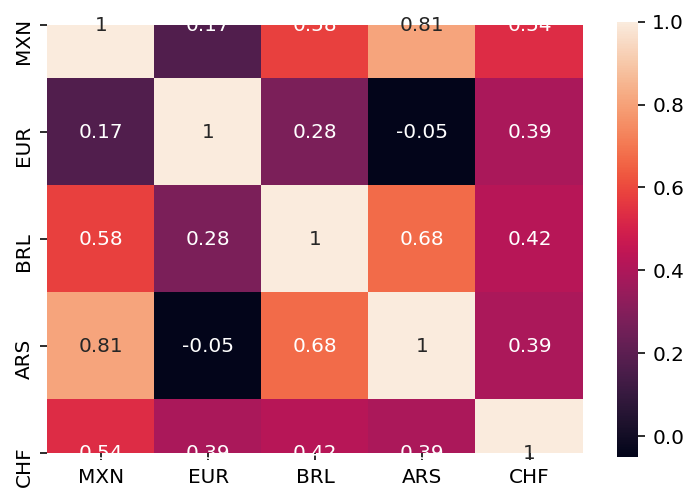

In [508]:
import seaborn as sns

df_data = df_data
ax = sns.heatmap(df_data.corr(), annot = True, square = True)


In [487]:


# Ejercicio 4



In [522]:
import matplotlib.pyplot as plt

corr = pd.DataFrame()

corr['EUR'] = df_data['MXN'].rolling(30).corr(df_data['EUR'])
corr['BRL'] = df_data['MXN'].rolling(30).corr(df_data['BRL'])
corr['ARS'] = df_data['MXN'].rolling(30).corr(df_data['ARS'])
corr['CHF'] = df_data['MXN'].rolling(30).corr(df_data['CHF'])

corr.loc['2015-03-19':'2015-03-24']
#corr.describe()


EUR       BRL       ARS       CHF
2015-03-19  0.886231  0.853806  0.811306  0.903006
2015-03-20  0.856822  0.792726  0.729511  0.887735
2015-03-22  0.843885  0.760590  0.678915  0.879735
2015-03-23  0.815665  0.699999  0.597524  0.865146
2015-03-24  0.792088  0.651083  0.530517  0.871501

In [535]:


# Ejercicio 5



/Users/grguevara/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/Users/grguevara/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/grguevara/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


' Correlación positiva marcada entre el EUR y el CHF\n'

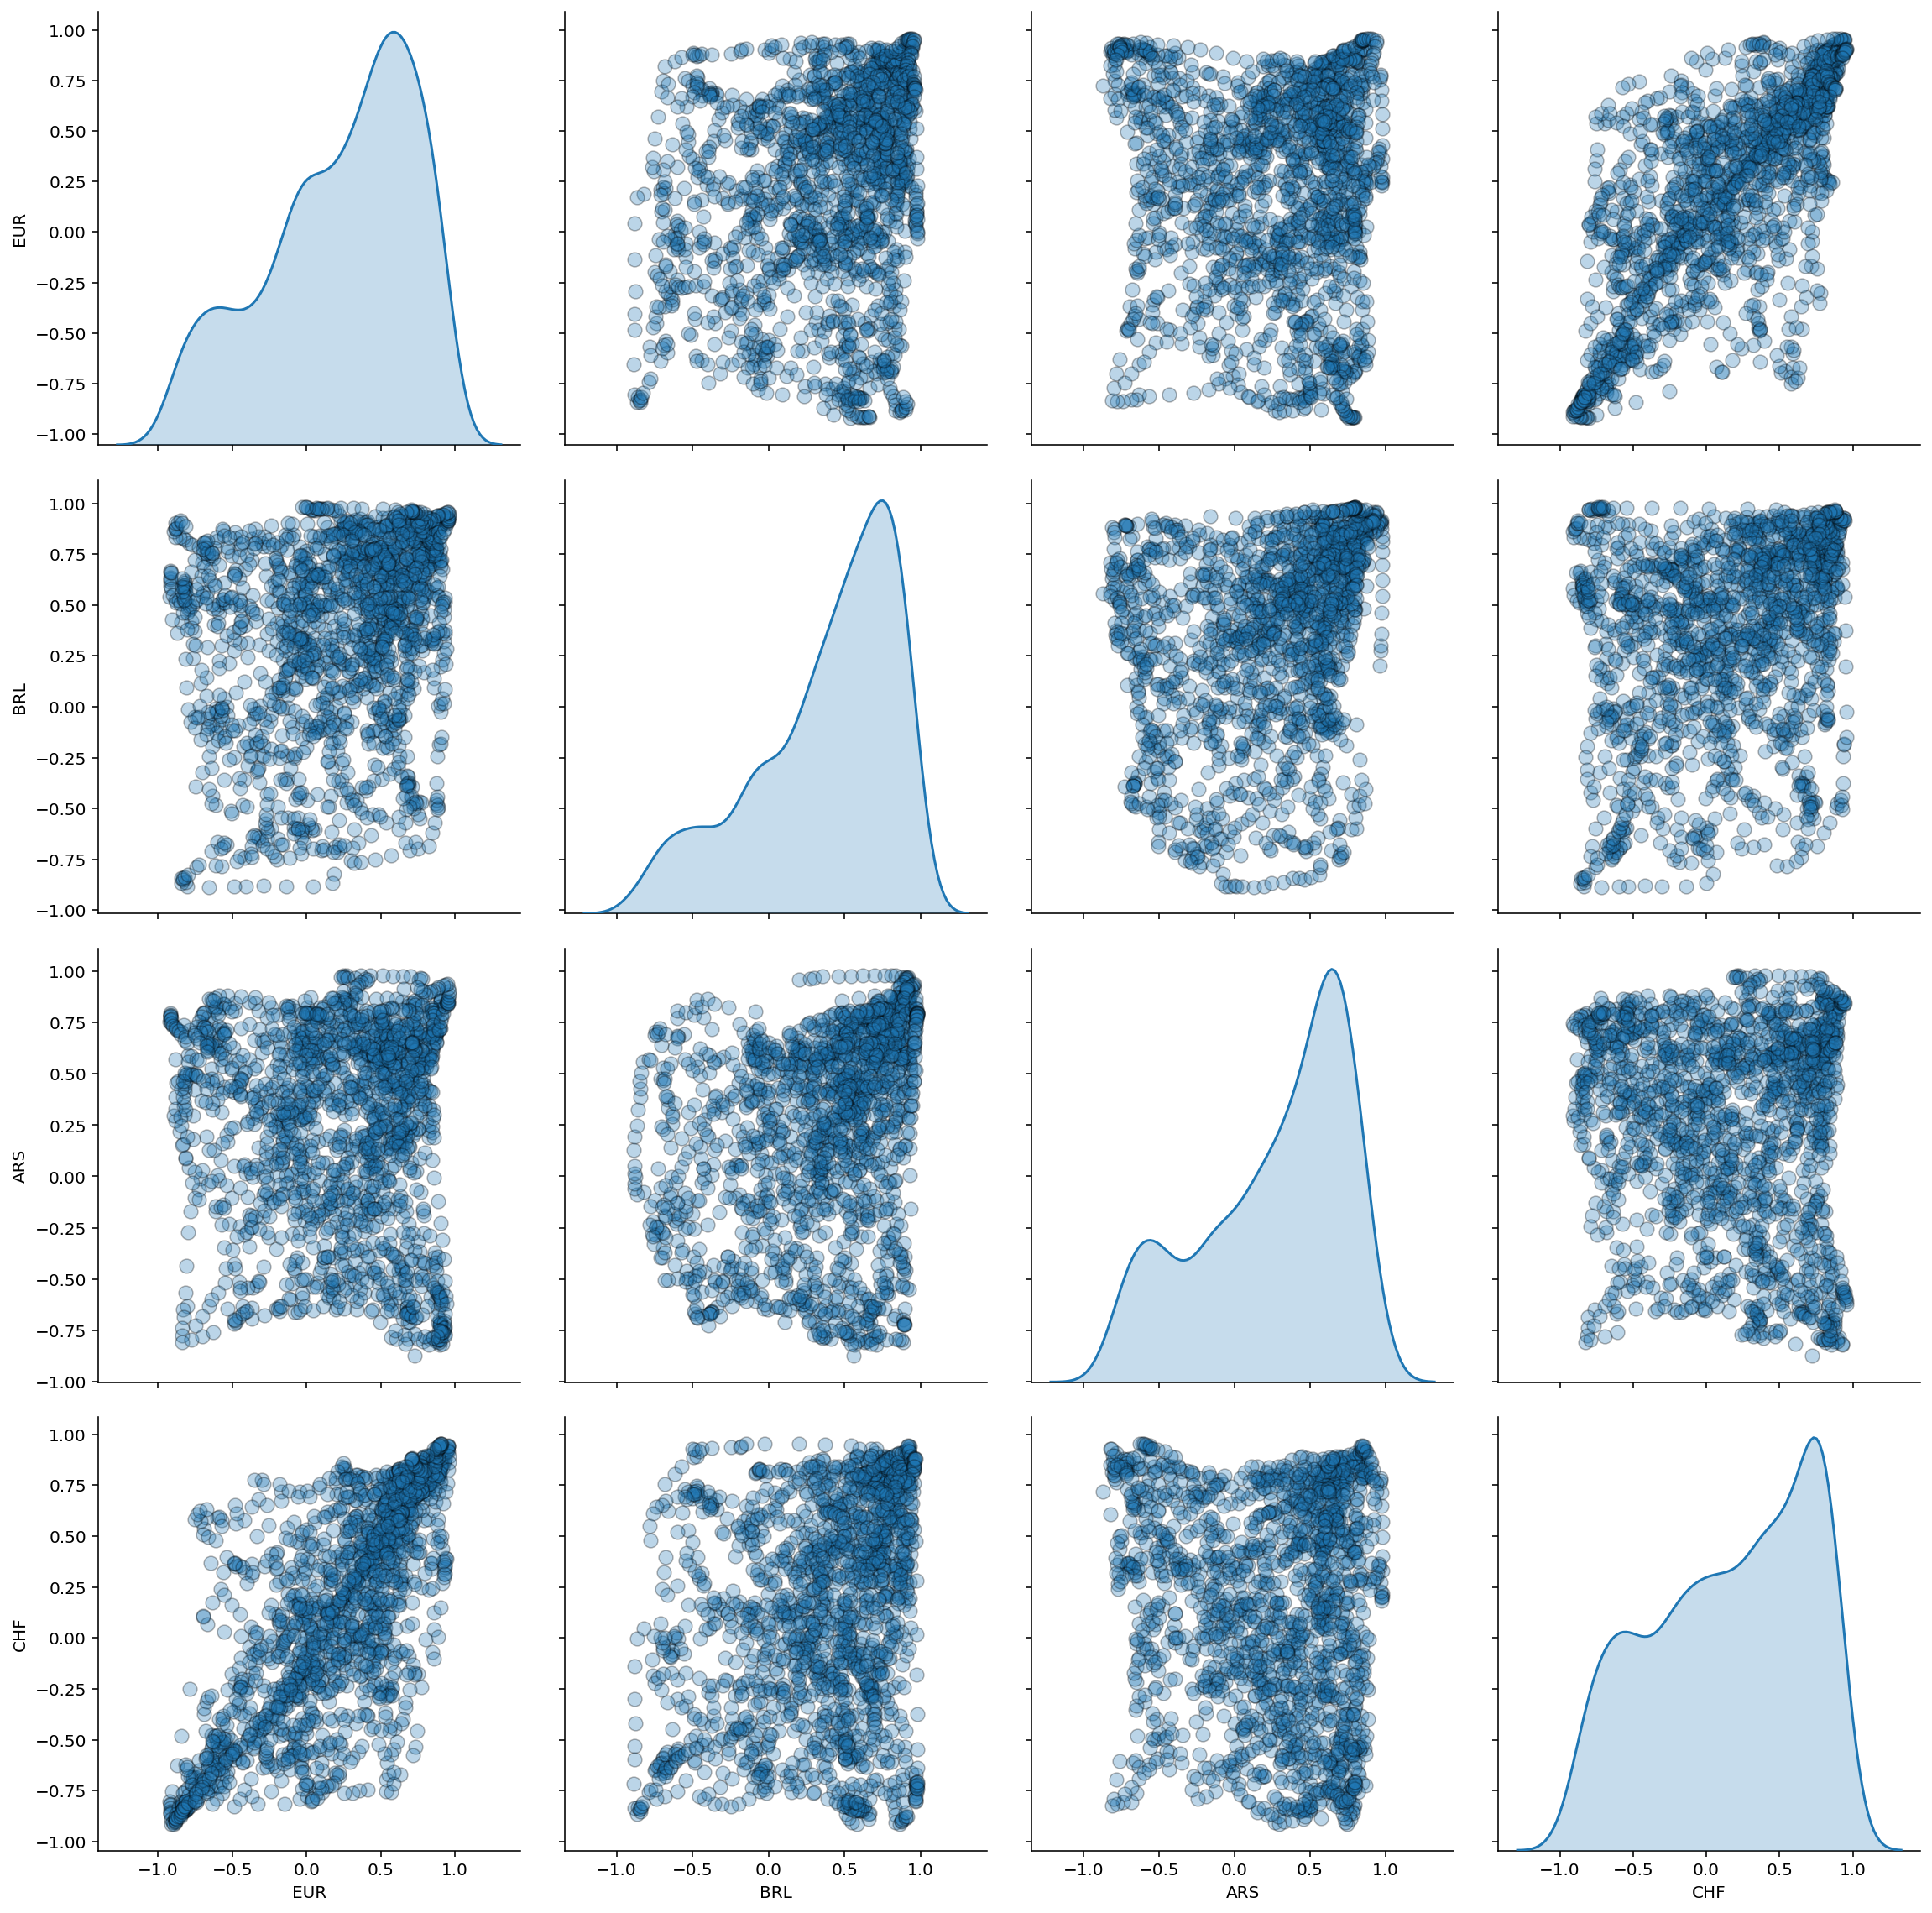

In [584]:
sns.pairplot(corr, diag_kind = 'kde',
             plot_kws = {'alpha': 0.3, 's': 70, 'edgecolor': 'k'},
             size = 4)


''' Correlación positiva marcada entre el EUR y el CHF'''

In [511]:


# Ejercicio 6



In [576]:
corr_mean = pd.DataFrame()

corr_mean['avg_corr'] = corr.mean(axis=1)
corr_mean['min'] = corr.min(axis=1)
corr_mean['max'] = corr.max(axis=1)

corr_mean

avg_corr       min       max
2014-11-07       NaN       NaN       NaN
2014-11-09       NaN       NaN       NaN
2014-11-10       NaN       NaN       NaN
2014-11-11       NaN       NaN       NaN
2014-11-12       NaN       NaN       NaN
...              ...       ...       ...
2020-02-27  0.113559 -0.339757  0.625458
2020-02-28  0.110143 -0.437630  0.704660
2020-02-29  0.110465 -0.513448  0.777876
2020-03-01  0.089672 -0.609615  0.807239
2020-03-02  0.063329 -0.706975  0.833296

[1787 rows x 3 columns]

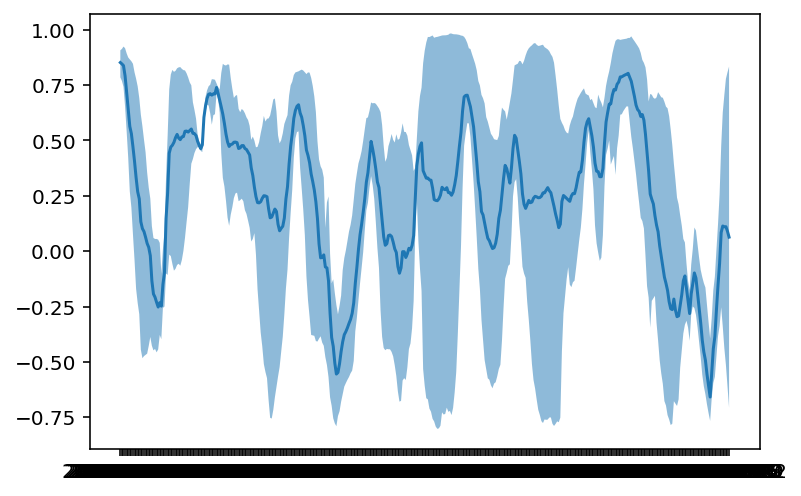

In [583]:
corr_graph = corr_mean[['avg_corr', 'min', 'max']][1400:1800]

plt.plot(corr_graph['avg_corr'])
plt.fill_between(range(corr_graph['avg_corr'].shape[0]), corr_graph['min'], corr_graph['max'],alpha=0.5)
plt.show()

## References


* https://developer.mozilla.org/en-US/docs/Web
* https://www.w3schools.com/tags/ref_httpmethods.asp

In [ ]:
#first currency
daily = {
        "function": "FX_DAILY",
        "to_symbol": 'MXN',
        "from_symbol": "USD",
        "apikey": avkey,
        "outputsize": "compact"
    }
r = requests.get(base_url, params=daily)
    
data = r.json()['Time Series FX (Daily)']
df_data = pd.DataFrame(pd.DataFrame(data, dtype=float).loc['4. close'])


for currency in currencies[1:3]:

    daily = {
        "function": "FX_DAILY",
        "to_symbol": currency,
        "from_symbol": "USD",
        "apikey": avkey,
        "outputsize": "compact"
    }
    r = requests.get(base_url, params=daily)
    
    data = r.json()['Time Series FX (Daily)']
    df_data_new = pd.DataFrame(pd.DataFrame(data, dtype=float).loc['4. close'])
    df_data = df_data.assign(currency = df_data_new)
    
df_data#.rename(columns={"4. close": f'{currency}'}))